# Titanic assignment

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sklearn.linear_model

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

df_train = pd.read_csv('datasets/titanic/train.csv')
df_test = pd.read_csv('datasets/titanic/test.csv') #does not have survived column

# View first lines of training data
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [2]:
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2AB438>]],
      dtype=object)

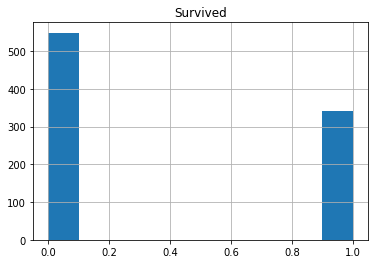

In [3]:
df_train.hist(column = 'Survived')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D346FD0>]],
      dtype=object)

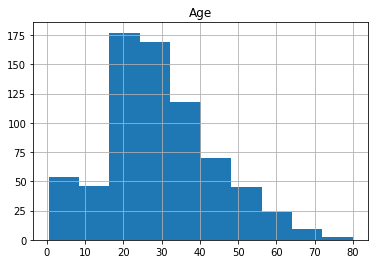

In [4]:
df_train.hist(column = 'Age')

In [5]:
def  bar_chart(feature):
    survived = df_train[df_train['Survived'] == 1][feature].value_counts()
    dead = df_train[df_train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize=(10,5))

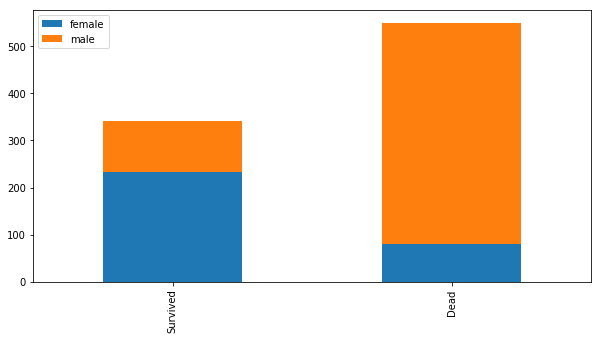

In [6]:
bar_chart('Sex')

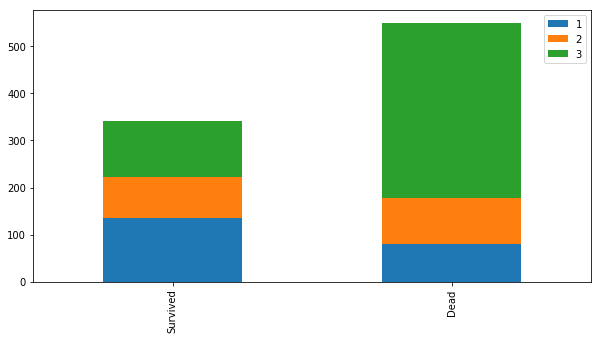

In [7]:
bar_chart('Pclass')

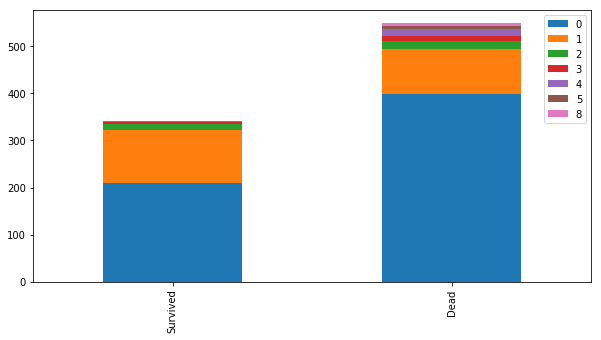

In [8]:
bar_chart('SibSp')

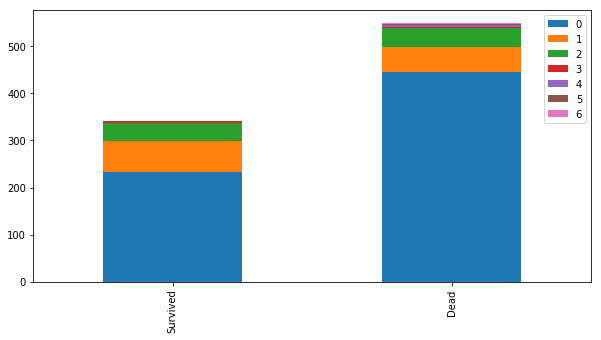

In [9]:
bar_chart('Parch')

In [10]:
"""
I thought making Sex into int would make them be able to compare but it
didn't but I left it to show somthing I tried.
"""

genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [11]:
#condit1 = df_test.Sex == 'female'
#condit2 = df_test.Pclass == 1

"""
I wanted to make conditions based off of Sex, Pclass, and SibSp but I could not combine a way to 
have them all be conditions for the Survied column added to test and put into the miklo_submission.csv

"""

df_test['Survived'] = (df_test.Pclass == 1) #and (df_test.Sex == 1)
print (df_test.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q     False  
1  47.0      1      0   363272   7.0000   NaN        S     False  
2  62.0      0      0   240276   9.6875   NaN        Q     False  
3  27.0      0      0   315154   8.6625   NaN        S     False  
4  22.0      1      1  3101298  12.2875   NaN        S     False  


In [12]:
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test[['PassengerId', 'Survived']].to_csv('datasets/titanic/miklo_submission.csv', index=False)
print (df_test[['PassengerId','Sex', 'Pclass', 'Survived']].head())

   PassengerId  Sex  Pclass  Survived
0          892    0       3         0
1          893    1       3         0
2          894    0       2         0
3          895    0       3         0
4          896    1       3         0
